# Root area ratio



## Initialise code

First, we need to load some python packages and functions. This will enable us to reading data from csv files, define units, and plot any results.

In [1315]:
import numpy as np
import matplotlib.pyplot as plt
from pyrootmemo.io import read_csv_roots
from pyrootmemo.helpers import units

## Load data

There are two sources of data available in the "sbee2025/data" folder:

* root intersection data for *Lolium perenne* (Talveg dataset)
* root intersection for *Onobrychis viciifolia* (Talveg dataset)

By default, this notebook loads the *Lolium perenne* data but you can easily change this out by changing the path to the relevant data file.

In [1316]:
# load tensile strength data from csv
data = read_csv_roots('data/experiment_lolium_perenne_talveg_20170615.csv')
# data = read_csv_roots('data/experiment_onobrychis_viciifolia_talveg_20170615.csv')

Your data is loaded into the object `data`. This object has attributes:

*  `diameter`: the diameter of each individual root
* `x0`: x-position of each root intersection with the window
* `y0`: y-position (depth) of each root intersection with the window

These data keeps its measurement units with it, so there is never any confusion as to what it units are! 

We can access these attributes as follows:


In [1317]:
# show data to screen using the 'print' command
print(data.diameter)

[0.5925947 0.4167025 0.8993398 0.8329021 0.3333647 0.4458273 0.4666702 0.3827785 0.6860556 0.3999654 0.59948277 0.43242484 0.51709384 0.42316586 0.31987343 0.43313183 0.49880788 0.36095377 0.45647502 0.56077186 0.5999157 0.4984257 0.99209234 0.13333333 0.13333333 0.56644004 0.56644004 0.5999294 0.3617728 0.3617728 0.4882239 0.4882239 0.788077 0.788077 0.7278205 0.7278205 0.39129466 0.39129466 0.58368642 0.58368642 0.46134714 0.86010166 0.49917128 0.6959834 0.6959834 0.29999375 0.29999375 0.59819143 0.59819143 0.76517954 0.76517954 0.54939784 0.564726 0.49169842 0.7614387 0.9974293 0.53334102 0.56653377 0.4966269 0.45542143 0.48047148 0.90000644 0.49508084 0.5666571 0.75840436 0.46041142 0.43267388 0.53202838 0.59342552 0.547689 0.59802458 0.3666592 0.2641946 0.39811105 0.7319399 0.19986995 0.29745292 0.33334177 0.96563324 0.69827646 0.59990663 0.6643481 0.5301914 0.55495616 0.32776352 0.26142126 0.3260311 0.50802466 0.49135037 0.56659874 0.13333333 0.59934627 0.39979633 0.43925587 0.46

In [1318]:
# show only values (with no units, i.e. the "magnitude" of the measurement)
print(data.diameter.magnitude)

[0.5925947  0.4167025  0.8993398  0.8329021  0.3333647  0.4458273
 0.4666702  0.3827785  0.6860556  0.3999654  0.59948277 0.43242484
 0.51709384 0.42316586 0.31987343 0.43313183 0.49880788 0.36095377
 0.45647502 0.56077186 0.5999157  0.4984257  0.99209234 0.13333333
 0.13333333 0.56644004 0.56644004 0.5999294  0.3617728  0.3617728
 0.4882239  0.4882239  0.788077   0.788077   0.7278205  0.7278205
 0.39129466 0.39129466 0.58368642 0.58368642 0.46134714 0.86010166
 0.49917128 0.6959834  0.6959834  0.29999375 0.29999375 0.59819143
 0.59819143 0.76517954 0.76517954 0.54939784 0.564726   0.49169842
 0.7614387  0.9974293  0.53334102 0.56653377 0.4966269  0.45542143
 0.48047148 0.90000644 0.49508084 0.5666571  0.75840436 0.46041142
 0.43267388 0.53202838 0.59342552 0.547689   0.59802458 0.3666592
 0.2641946  0.39811105 0.7319399  0.19986995 0.29745292 0.33334177
 0.96563324 0.69827646 0.59990663 0.6643481  0.5301914  0.55495616
 0.32776352 0.26142126 0.3260311  0.50802466 0.49135037 0.56659874

In [1319]:
# show the unit of measurement
print(data.diameter.units)

millimeter


We can easily convert between different unit types by using the `.to()` method.

In [1320]:
# show diameter values in inches
print(data.diameter.to('inch'))

[0.023330500000000004 0.016405610236220475 0.035407078740157485 0.032791421259842524 0.013124594488188979 0.017552255905511814 0.018372842519685042 0.015070019685039373 0.027010062992125987 0.015746669291338587 0.023601683858267723 0.0170246 0.0203580251968504 0.01666007322834646 0.012593442125984254 0.017052434251968507 0.019638105511811027 0.014210778346456695 0.017971457480314965 0.02207763228346457 0.0236187283464567 0.019623059055118113 0.039058753543307095 0.005249343700787402 0.005249343700787402 0.022300788976377956 0.022300788976377956 0.023619267716535434 0.014243023622047246 0.014243023622047246 0.019221413385826773 0.019221413385826773 0.03102665354330709 0.03102665354330709 0.028654350393700793 0.028654350393700793 0.015405301574803153 0.015405301574803153 0.022979780314960636 0.022979780314960636 0.01816327322834646 0.03386227007874016 0.0196524125984252 0.027400921259842524 0.027400921259842524 0.01181077755905512 0.01181077755905512 0.023550843700787406 0.02355084370078

## Plotting

### Histogram of all diameters

Let's plot a histogram showing the distribution of measured diameters.

Text(0, 0.5, 'Number of roots [-]')

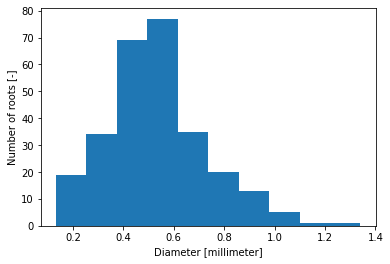

In [1321]:
# plot a histogram
plt.hist(data.diameter.magnitude)

# set axis labels
plt.xlabel('Diameter [' + str(data.diameter.units) + ']')
plt.ylabel('Number of roots [-]')

## Total root area ratio

In order to calculate any root area ratios we need to define the size of the window.

First, manually set the x (horizontal) and y (depth) position of the sides of the window. 

In [1322]:
window_x = [0, 26] * units('cm')
window_y = [0, 20] * units('cm')

We can now calculate the area of the window:

In [1323]:
window_width = window_x[1] - window_x[0]
window_height = window_y[1] - window_y[0]
window_area = window_width * window_height
print(window_area)

520 centimeter ** 2


The total root area ratio is defined as the total cross-sectional area of the root divided by the cross-sectional area of the soil. Let's do some calculations:

In [1324]:
root_area_perroot = np.pi * (data.diameter / 2)**2
root_area_ratio_perroot = root_area_perroot / window_area
root_area_ratio = sum(root_area_ratio_perroot)
print(root_area_ratio)

0.1345242511221728 millimeter ** 2 / centimeter ** 2


Root diameters and window dimensions may have different units (e.g. millimetres 
and centimetres). The root area ratio is now defined with unusual units. 
Therefore, let us convert the calculated root area ratio to a more 
user-friendly unit, such as a dimensionless unit (e.g. mm^2/mm^2) or 
a percentage:

In [1325]:
print(root_area_ratio.to("mm^2/mm^2"))
print(root_area_ratio.to("%"))

0.0013452425112217281 dimensionless
0.1345242511221728 percent


## Locations of each individual root

Let's also have a look at the locations of each root, using a scatter plot.

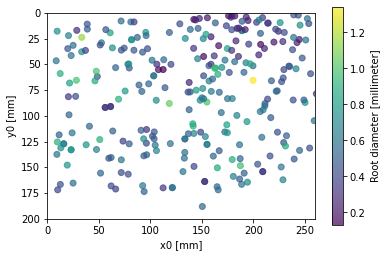

In [1326]:
# set measurement unit for axes
axes_units = 'mm'

# plot a scatter plot
fig, ax = plt.subplots()
scatter = plt.scatter(
    data.x0.to(axes_units).magnitude,  # x-position
    data.y0.to(axes_units).magnitude,  # y-position
    c = data.diameter.magnitude,       # colours 
    alpha = 0.7                        # transparancy of marker points
    )

# set the axes
ax.set_aspect('equal', 'box')
ax.set_xlabel('x0 [' + axes_units + ']')
ax.set_ylabel('y0 [' + axes_units + ']')
ax.set_xlim(window_x.to(axes_units).magnitude)
ax.set_ylim(reversed(window_y.to(axes_units).magnitude))

# add a colour bar
fig.colorbar(
    scatter, 
    ax = ax, 
    label = 'Root diameter [' + str(data.diameter.units) + ']'
    )

## Root area ratio per grid cell and diameter range

Now make a plot that shows the root area ratio in each grid cell. 

First, define the number of individual bins in the 'x' and 'y' directions.

With these defined, we can calculte the x and y positions of the edges of 
each bin.

In [1327]:
# set the number of depth intervals (y) and columns (x)
x_bins = 5
y_bins = 4

# calculate the positions of the edges of all bins
x_edges = np.linspace(window_x[0], window_x[1], x_bins + 1)
y_edges = np.linspace(window_y[0], window_y[1], y_bins + 1)

Now calculate the root area ratio contribution of each root to the window grid cell
it is part of:

In [1328]:
# area of each grid cell
grid_area = window_area / (x_bins * y_bins)
# contribution of each individual root to the root area ratio in each grid cell
rar_grid_contribution = root_area_perroot / grid_area


We could plot the root area ratio for a series of diameter range. These ranges
are dividided by limits. For example, the limits below - by default - specify
three ranges: 0 to 0.5 mm, 0.5 to 1 mm and 1 to 100 mm. You can adjust this as you
see fit.

In [1329]:
# set the minimum and maximum diameter of all roots to include in the plot
diameter_limits = [0, 0.5, 1, 100] * units('mm')

With grids and diameter ranges defined, we can plot a 2-dimensional histogram showing 
how the root area ratio changes with changing positions along the window:

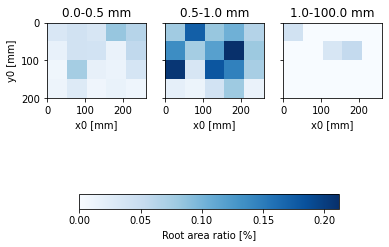

In [1330]:
# define unit system used for plotting
axes_unit = 'mm'
rar_unit = '%'

# bin data and make subplot titles
binned_data = []
subplot_titles = []
for dmin, dmax in zip(diameter_limits[:-1], diameter_limits[1:]):
    mask = (data.diameter > dmin) & (data.diameter <= dmax)
    binned_data.append(np.histogram2d(
        data.x0[mask].to(axes_units).magnitude,  # x-positions of each root
        data.y0[mask].to(axes_units).magnitude,  # y-positions of each root
        bins = [
            x_edges.to(axes_units).magnitude, 
            y_edges.to(axes_units).magnitude
            ],                                   # bins settings
        weights = rar_grid_contribution[mask].to(rar_unit).magnitude
        ))
    subplot_titles.append(str(dmin.magnitude) + '-' + str(dmax.magnitude) + ' mm')
rar_max = max(np.max(i[0]) for i in binned_data)

# plot binned results
fig, axs = plt.subplots(1, len(diameter_limits) - 1, sharex = True, sharey = True, squeeze = False)
axs[0, 0].set_ylabel('y0 [' + axes_units + ']')
for ax, bi, spt in zip(axs.flatten(), binned_data, subplot_titles):
    a = ax.imshow(
        bi[0].transpose(),
        vmin = 0.0,
        vmax = rar_max,
        cmap = "Blues",
        origin = 'lower',
        extent = [*window_x.to(axes_unit).magnitude, *window_y.to(axes_unit).magnitude]
        )
    ax.set_xlabel('x0 [' + axes_units + ']')
    ax.set_ylim(reversed(window_y.to(axes_units).magnitude))
    ax.set_title(spt)

# add colourbar for root area ratio results
fig.subplots_adjust(bottom = 0.25)
cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.05])
fig.colorbar(
    a, 
    cax = cbar_ax, 
    label = 'Root area ratio [%]',
    orientation = 'horizontal')


## Explore!

You can now investigate:

* How does the root area ratio change with depth? You could look at this by:
  * varying the number of y-bins
  * setting the number of bins in the x-direction to 1
  * setting a wide diameter class to capture all roots, i.e.:
    `diameter_range = [0, 100] * units('mm')`

* What is the contribution of different diameter ranges to the total root 
  area ratio?. Does most of the root area ratio come from relatively thin 
  or relatively thick roots?

* Vary the number of bins in x and y-directions. What do you think is a 
  reasonable bin size for this data?
  
  * ...too many bins and we get a lot of scatter...
  * ...too few bins and we lose too much information about the location of each root...

* Now use a different dataset, for example the data for
  *Onobrychis viciifolia*. Are your results and choices different?